In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense,Flatten,Activation,Input
from keras.models import Sequential,Model

from keras.layers import Conv2D,MaxPooling2D,UpSampling2D

In [2]:
data = pd.read_csv('MNIST/train.csv')
target = data['label']
del data['label']


In [3]:
train = data[:1000]

In [4]:
print(train.shape)

(1000, 784)


In [5]:
train = np.array(train)
train = train.reshape(1000,28,28)

In [6]:
train = train.astype('float32') / 255.0

In [7]:
print(train.shape)

(1000, 28, 28)


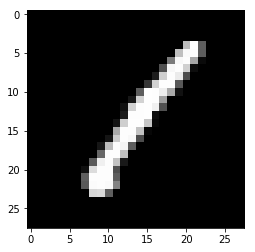

In [8]:
plt.imshow(train[0],cmap='gray')

In [11]:
train = train.reshape(1000,28,28,1)
print(train.shape)

(1000, 28, 28, 1)


In [25]:
img = Input(shape=(28,28,1))

# encoder model .....
encoder = Conv2D(16,(3,3),activation='relu',padding='same')(img)
# 28 x 28 x 16 .....
encoder = MaxPooling2D((2,2),padding='same')(encoder)
# 14 x 14 x 16 .....
encoder = Conv2D(8,(3,3),activation='relu',padding='same')(encoder)
# 14 x 14 x 8 .....
encoder = MaxPooling2D((2,2),padding='same')(encoder)
# 7 x 7 x 8 .....



# decoder model .....
decoder = Conv2D(8,(3,3),activation='relu',padding='same')(encoder)
decoder = UpSampling2D((2,2))(decoder)

# 24 x 24 x 8 .....

decoder = Conv2D(16,(3,3),activation='relu',padding='same')(decoder)

decoder = UpSampling2D((2,2))(decoder)

decoded = Conv2D(1,(3,3),activation='sigmoid',padding='same')(decoder)

autoencoder = Model(img,decoded)


In [26]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')

In [27]:
autoencoder.fit(train,train,epochs=50,batch_size=16)

Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4732A
Epoch 2/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1751
Epoch 3/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1388
Epoch 4/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1245
Epoch 5/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1145A
Epoch 6/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1068
Epoch 7/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1008A: 0s - loss: 0.
Epoch 8/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0971
Epoch 9/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0948
Epoch 10/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0931
Epoch 11/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0916A: 1
Epoch 12/50
1000/1000 [==============================] - 2s 2ms

In [28]:
pred = autoencoder.predict(train)

In [33]:
pred = pred.reshape(1000,28,28)

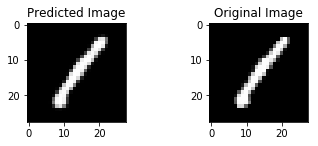

In [37]:
plt.subplot(2,2,1)
plt.title("Predicted Image")
plt.imshow(pred[0],cmap="gray")

plt.subplot(2,2,2)
plt.title("Original Image")
plt.imshow(train[0].reshape(28,28),cmap="gray")

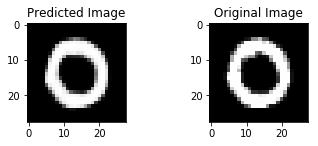

In [38]:
plt.subplot(2,2,1)
plt.title("Predicted Image")
plt.imshow(pred[1],cmap="gray")

plt.subplot(2,2,2)
plt.title("Original Image")
plt.imshow(train[1].reshape(28,28),cmap="gray")

In [42]:
img = Input(shape=(28,28,1))

encoder = Conv2D(32,(3,3),activation='relu',padding='same')(img)
encoder = MaxPooling2D((2,2))(encoder)

encoder = Conv2D(16,(3,3),activation='relu',padding='same')(encoder)
encoder = MaxPooling2D((2,2))(encoder)

decoder = Conv2D(16,(3,3),activation='relu',padding='same')(encoder)
decoder = UpSampling2D((2,2))(decoder)

decoder = Conv2D(32,(3,3),activation='relu',padding='same')(decoder)
decoder = UpSampling2D((2,2))(decoder)

decoded = Conv2D(1,(3,3),activation='sigmoid',padding='same')(decoder)

In [43]:
autoencoder = Model(img,decoded)
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')


In [44]:
autoencoder.fit(train,train,epochs=10,batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.5015
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2103
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1398
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1153
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1054
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1003A: 1s - l
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0967
Epoch 8/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0940
Epoch 9/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0928
Epoch 10/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0908


In [45]:
pred = autoencoder.predict(train)

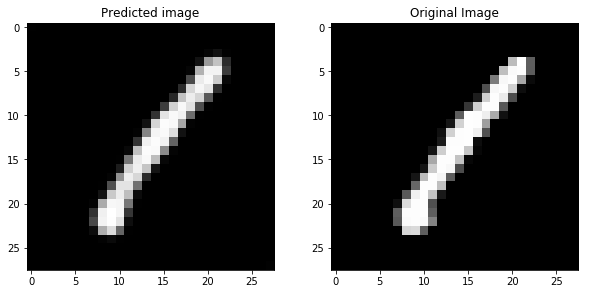

In [52]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Predicted image")
plt.imshow(pred[0].reshape(28,28),cmap='gray')

plt.subplot(2,2,2)
plt.title("Original Image")
plt.imshow(train[0].reshape(28,28),cmap='gray')